# Getting Started

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

## From SMILES to Files

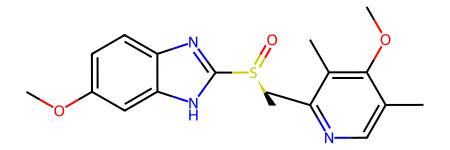

In [100]:
# using the example molecule from tutorial notebook 001
m = Chem.MolFromSmiles('COc1ccc2c(c1)[nH]c(n2)[S@@](=O)Cc1ncc(c(c1C)OC)C')
m

In [103]:
# Doesn't have a conformer coming from SMILES
m.GetNumConformers()

0

In [108]:
# Write the SMILES molecule to a MolBlock (V2000 syntax) file
Chem.MolToMolFile(m,'test/some_mol.mol')
# Writing to file writes as MolBlock, so conformer is generated
m2 = Chem.MolFromMolFile('test/some_mol.mol')
m2.GetNumConformers()

1

In [110]:
# original mol still has no conformer
m.GetNumConformers()

0

In [114]:
m.Compute2DCoords()
m.GetNumConformers()

1

In [130]:
# Now let's compare computed conformers
m_conf = Chem.MolToMolBlock(m)
m2_file = open('test/some_mol.mol','r')
m2_conf = m2_file.read()
print(f"{m_conf}\n\n{m2_conf}")
# They have different geometries!


     RDKit          2D

 24 26  0  0  0  0  0  0  0  0999 V2000
   -8.5505   -0.5131    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.2498   -1.2602    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -5.9524   -0.5073    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.9558    0.9927    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6584    1.7457    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.3577    0.9986    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.3544   -0.5014    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6517   -1.2543    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9267   -0.9617    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0478    0.2538    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9322    1.4653    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.4522    0.2571    0.0000 S   0  0  0  0  0  4  0  0  0  0  0  0
    1.1993    1.5579    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.2051   -1.0402    0

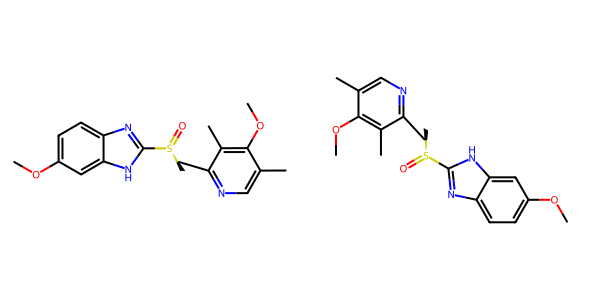

In [134]:
# This is just orientation, as can be seen clearly here
# But note above that the bonding structure and atom indices are the same
mols = [m, m2]
Draw.MolsToGridImage(mols,molsPerRow=2,subImgSize=(300,300))

In [135]:
# Conformer is necessary for generating an xyz file
Chem.MolToXYZFile(m, 'test/some_mol.xyz')
xyz_file = open('test/some_mol.xyz', 'r')
xyz_data = xyz_file.read()
print(xyz_data)

24

C     -8.550493   -0.513101    0.000000
O     -7.249772   -1.260178    0.000000
C     -5.952423   -0.507258    0.000000
C     -5.955797    0.992738    0.000000
C     -4.658449    1.745657    0.000000
C     -3.357727    0.998581    0.000000
C     -3.354354   -0.501415    0.000000
C     -4.651702   -1.254335    0.000000
N     -1.926730   -0.961731    0.000000
C     -1.047784    0.253774    0.000000
N     -1.932189    1.465314    0.000000
S      0.452213    0.257147    0.000000
O      1.199289    1.557869    0.000000
C      1.205132   -1.040201    0.000000
C      2.705128   -1.036827    0.000000
N      3.458048   -2.334175    0.000000
C      4.958044   -2.330802    0.000000
C      5.705121   -1.030080    0.000000
C      4.952201    0.267268    0.000000
C      3.452205    0.263894    0.000000
C      2.699285    1.561242    0.000000
O      5.699278    1.567989    0.000000
C      4.946358    2.865337    0.000000
C      7.205117   -1.026707    0.000000



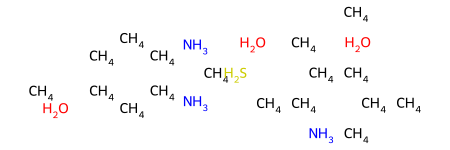

In [74]:
# but bonding data is lost in xyz file, no way to include without mol file syntax
m4 = Chem.MolFromXYZBlock(xyz_data)
m4

### 3D molecules

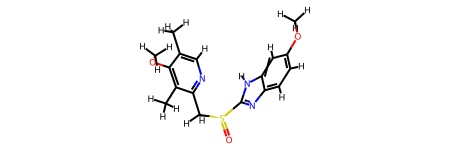

In [140]:
# Hydrogens must be added to generate 3D structure
m3d = Chem.AddHs(m)
# Still unclear as to whether AllChem must be imported separately, 
# but it's part of the Chem module and works fine here without importing.
AllChem.EmbedMolecule(m3d,randomSeed=0xf00d)
m3d

In [137]:
# A look at the calculated coordinates
Chem.MolToMolFile(m3d,'test/some_3Dmol.mol')
with open('test/some_3Dmol.mol') as m3d_conf:
    print(m3d_conf.read())


     RDKit          3D

 43 45  0  0  0  0  0  0  0  0999 V2000
    4.9463    3.2437   -0.7134 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.1365    2.2690    0.2802 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.4312    1.0787    0.3204 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.6380    0.1444    1.3032 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8932   -1.0260    1.2787 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.9608   -1.2798    0.3092 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7559   -0.3454   -0.6715 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.4985    0.8382   -0.6599 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8035   -0.8436   -1.4769 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.4005   -2.0601   -1.0372 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1356   -2.2969    0.0654 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.1447   -3.1243   -1.7575 S   0  0  0  0  0  4  0  0  0  0  0  0
    0.6128   -4.5384   -1.3340 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3248   -2.8700   -0

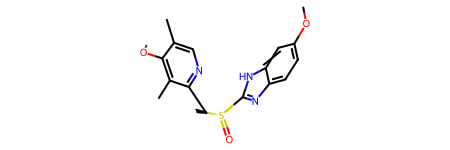

In [139]:
# 3D structure is preserved after removing the H's
m3d_noH = Chem.RemoveHs(m3d)
m3d_noH

## Files to Mols

### File > Block > Mol

In [39]:
ala_file = open('amino_acids/ala.mol','r')
ala_block = ala_file.read()
print(ala_block)

Alanine, ID: C56417
  NIST    22120111172D 1   1.00000     0.00000      
Copyright by the U.S. Sec. Commerce on behalf of U.S.A. All rights reserved.
  6  5  0     0  0              1 V2000
    1.7581    1.5571    0.0000 C   0  0  0  0  0  0           0  0  0
    0.8539    1.0046    0.0000 C   0  0  0  0  0  0           0  0  0
    0.8539    0.0000    0.0000 C   0  0  0  0  0  0           0  0  0
    0.0000    1.5069    0.0000 N   0  0  0  0  0  0           0  0  0
    1.7581    2.5115    0.0000 O   0  0  0  0  0  0           0  0  0
    2.6120    1.0548    0.0000 O   0  0  0  0  0  0           0  0  0
  1  2  1  0     0  0
  1  5  1  0     0  0
  1  6  2  0     0  0
  2  3  1  0     0  0
  2  4  1  6     0  0
M  END



C[C@H](N)C(=O)O


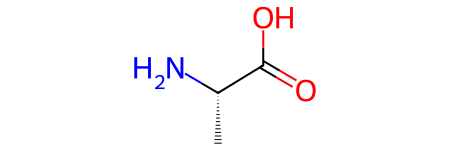

In [78]:
ala = Chem.MolFromMolBlock(ala_block)
ala_smiles = Chem.MolToSmiles(ala)
print(ala_smiles)
ala

### Mol from file

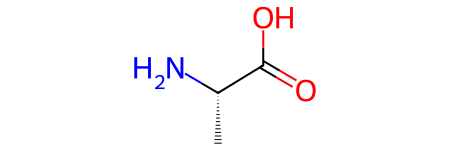

In [42]:
ala2 = Chem.MolFromMolFile('amino_acids/ala.mol')
ala2

### from SDF file

In [5]:
nat20 = Chem.SDMolSupplier('amino_acids/amino_acids.sdf')
twenty = len(nat20)
print(twenty)

20


In [6]:
for mol in nat20:
    print(Chem.MolToSmiles(mol))

C[C@H](N)C(=O)O
N=C(N)NCCC[C@H](N)C(=O)O
NC(=O)C[C@H](N)C(=O)O
N[C@@H](CC(=O)O)C(=O)O
N[C@@H](CS)C(=O)O
NC(=O)CC[C@H](N)C(=O)O
N[C@@H](CCC(=O)O)C(=O)O
NCC(=O)O
N[C@@H](Cc1c[nH]cn1)C(=O)O
CC[C@@H](C)[C@H](N)C(=O)O
CC(C)C[C@H](N)C(=O)O
NCCCC[C@H](N)C(=O)O
CSCC[C@H](N)C(=O)O
N[C@@H](Cc1ccccc1)C(=O)O
O=C(O)[C@@H]1CCCN1
N[C@@H](CO)C(=O)O
C[C@@H](O)[C@H](N)C(=O)O
N[C@@H](Cc1c[nH]c2ccccc12)C(=O)O
N[C@@H](Cc1ccc(O)cc1)C(=O)O
CC(C)[C@H](N)C(=O)O


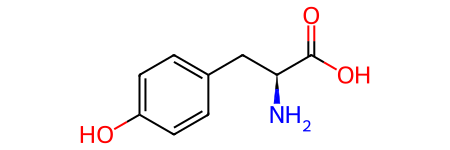

In [7]:
# this works because of the iPythonConsole I think
nat20[18]

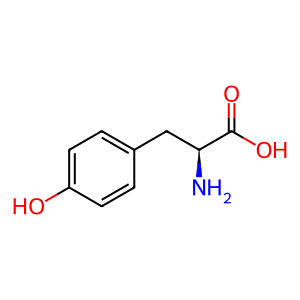

In [8]:
# normally this is the way to make the image
Draw.MolToImage(nat20[18])

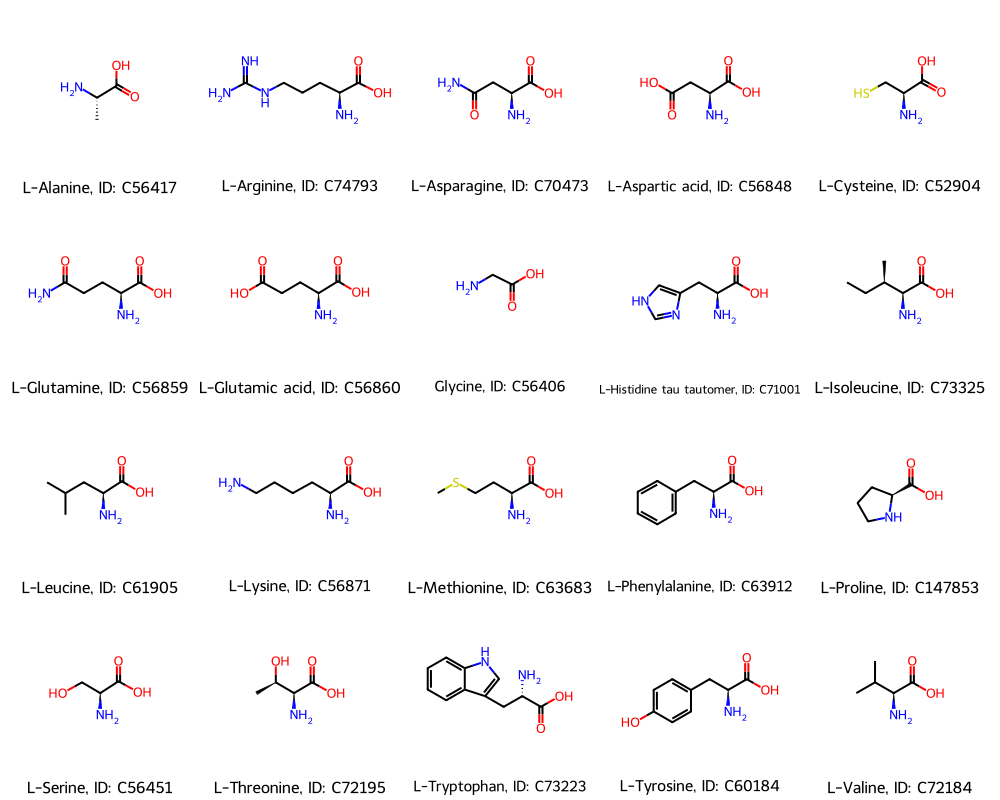

In [9]:
Draw.MolsToGridImage(nat20,molsPerRow=5,subImgSize=(200,200),legends=[mol.GetProp("_Name") for mol in nat20])

### Multiple SMILES in file

In [17]:
nat20[17].GetPropsAsDict(True, True)


{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE at 0x7f12ab5ba580>,
 '_Name': 'L-Tryptophan, ID: C73223',
 '_MolFileInfo': '  NIST    22120115352D 1   1.00000     0.00000      ',
 '_MolFileComments': '',
 'numArom': 2,
 '_StereochemDone': 1}